In [1]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (10,5)


In [2]:
#LOAD DATA
df = pd.read_csv("IBM.csv")
df.head()
df.shape
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   str  
 2   BusinessTravel            1470 non-null   str  
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   str  
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   str  
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   str  
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null   int64
 15

In [3]:
#DATA CLEANING
df.isnull().sum()
drop_cols = [
    'EmployeeCount','EmployeeNumber','Over18','StandardHours'
]

df.drop(columns=drop_cols, inplace=True)
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


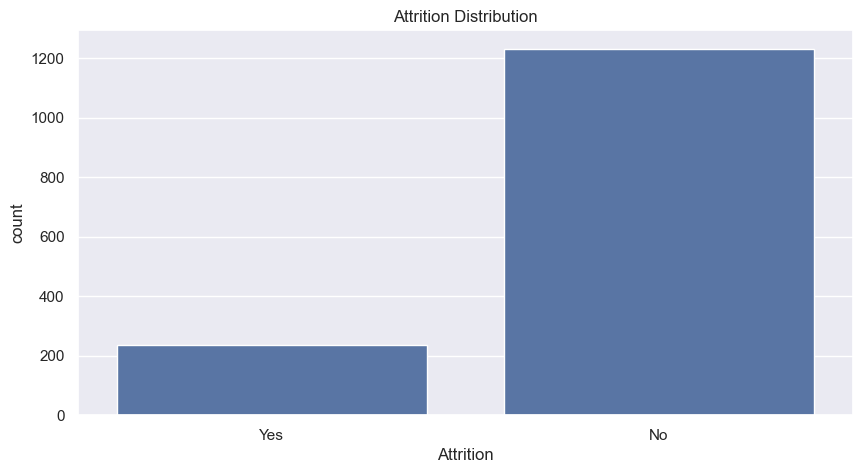

In [4]:
#BASIC EXPLORATION
df['Attrition'].value_counts()
sns.countplot(x='Attrition', data=df)
plt.title("Attrition Distribution")
plt.show()

#COMPANY HAS IMBALANCED ATTRITION DATASET

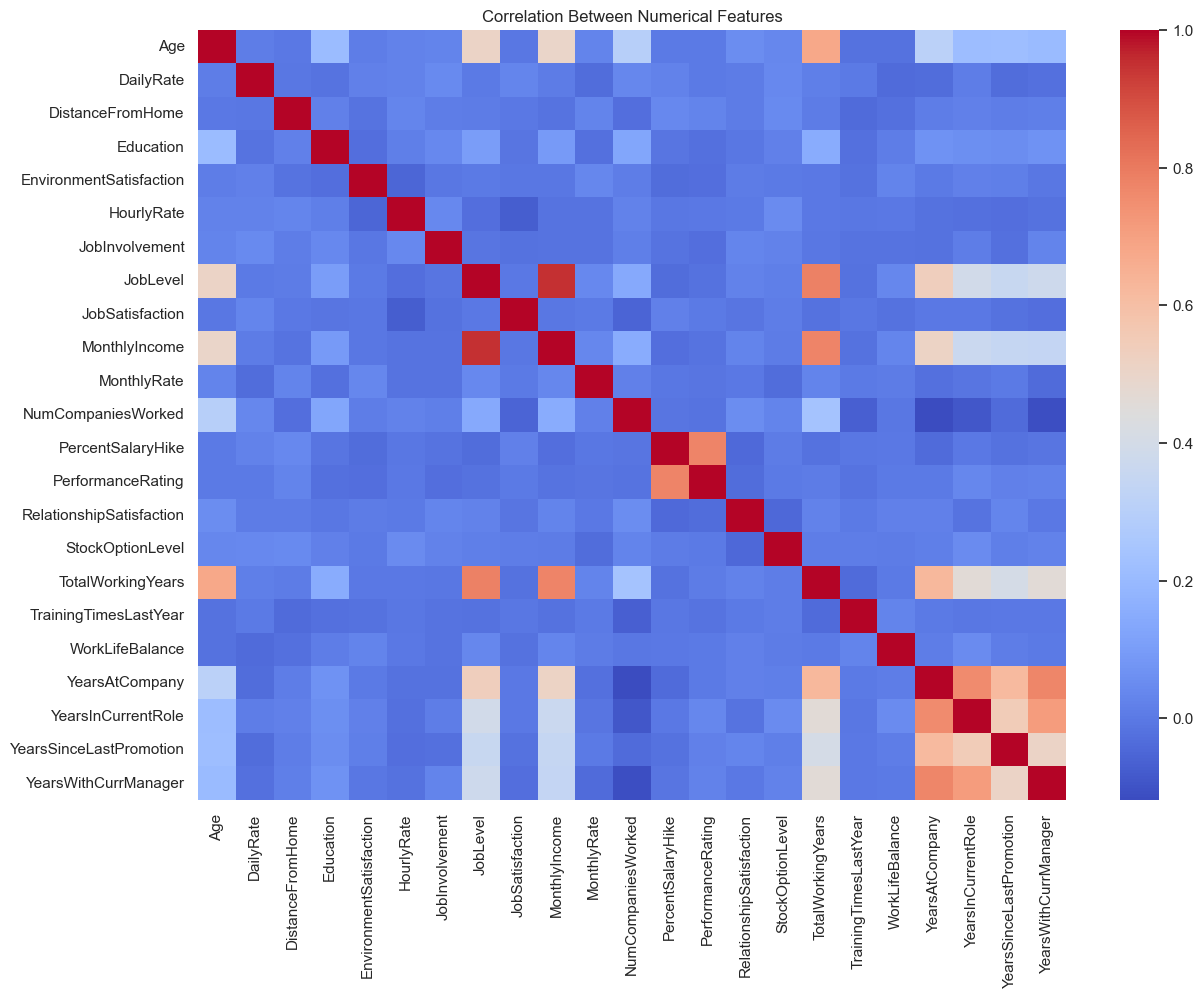

In [5]:
#NUMERICAL ANALYSIS - correlation heatmap
plt.figure(figsize=(14,10))
corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr, cmap='coolwarm')
plt.title("Correlation Between Numerical Features")
plt.show()


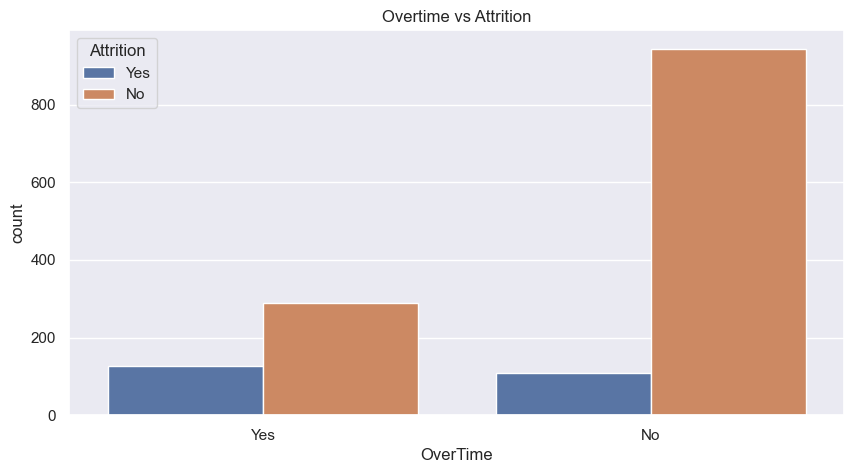

In [6]:
#ATTRITION INSIGHTS
#overtime impact
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title("Overtime vs Attrition")
plt.show()


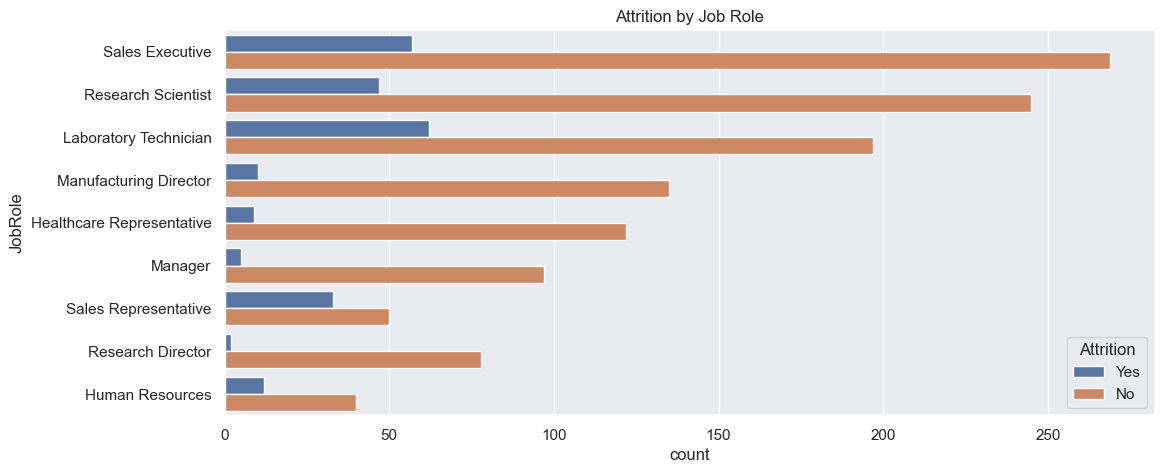

In [7]:
#job role impact
plt.figure(figsize=(12,5))
sns.countplot(y='JobRole', hue='Attrition', data=df)
plt.title("Attrition by Job Role")
plt.show()


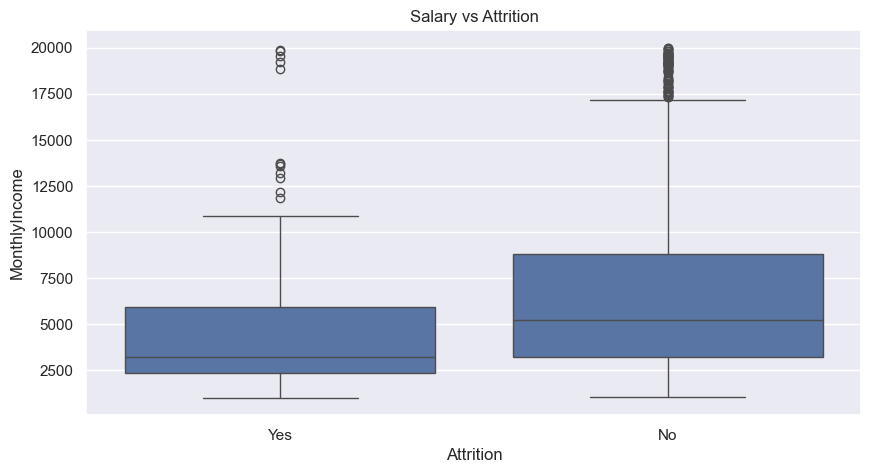

In [8]:
#salary impact
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Salary vs Attrition")
plt.show()


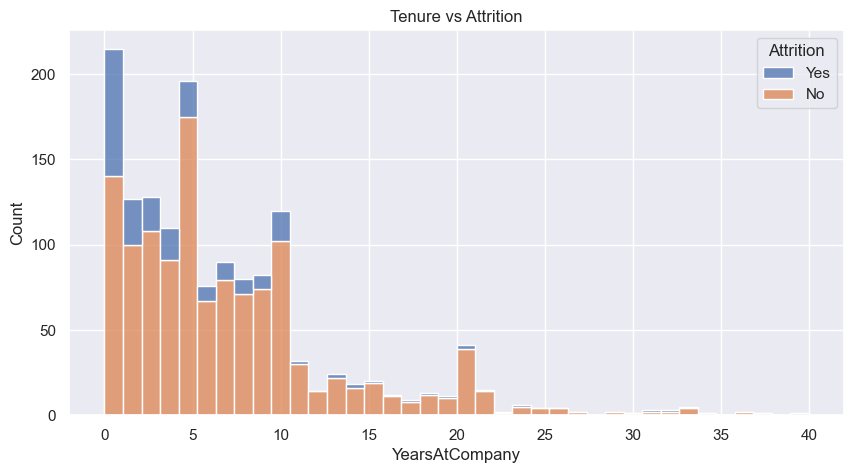

In [9]:
#experience impact
sns.histplot(data=df, x='YearsAtCompany', hue='Attrition', multiple='stack')
plt.title("Tenure vs Attrition")
plt.show()


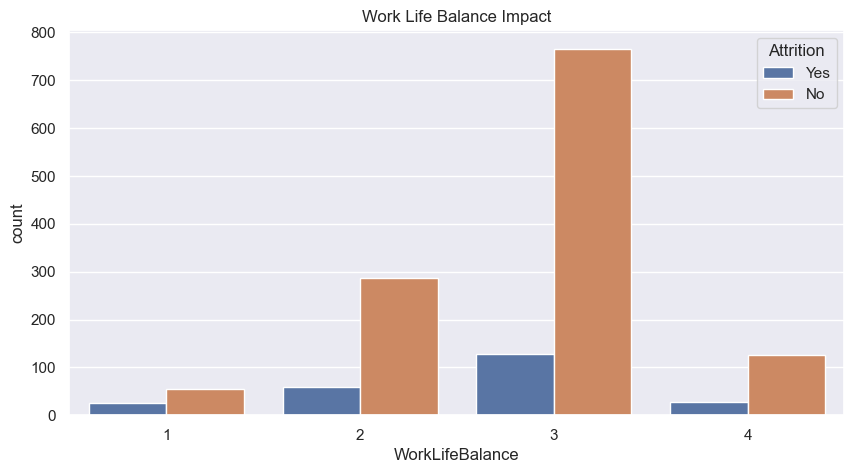

In [10]:
#work life balance
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df)
plt.title("Work Life Balance Impact")
plt.show()


In [11]:
#ADVANCED INSIGHT
attrition_rate = df.groupby('Department')['Attrition'].value_counts(normalize=True).unstack()*100
attrition_rate['Yes'].sort_values(ascending=False)


Department
Sales                     20.627803
Human Resources           19.047619
Research & Development    13.839750
Name: Yes, dtype: float64

#CONCLUSION :

Key Findings:
-> Overtime employees leave more

-> Low salary increases attrition

-> Early career employees leave more

-> Certain job roles have high turnover

-> Work-life balance strongly impacts retention